<a href="https://colab.research.google.com/github/julianacholder/ml_summative/blob/main/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CostMyDegree**

## Synopsis
A predictive model for international master's degree tuition fees to help
students make informed decisions about their education investments.

## Dataset Description
Source: Kaggle (Abroad Study Cost Predictor)

Features:
- Country (7 different countries)
- Course Type (8 different fields)
- University Type (Public/Private)
- Mode of Study (Full-time/Online)
- Tuition Fees (Target variable in USD)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [ ]:
# Load and prepare the data
df = pd.read_csv('tuition.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le_country = LabelEncoder()
le_course = LabelEncoder()
le_univ_type = LabelEncoder()
le_mode = LabelEncoder()


# Transform and create mappings
df['Country'] = le_country.fit_transform(df['COUNTRY'])
df['Course'] = le_course.fit_transform(df['COURSE TYPE'])
df['University Type'] = le_univ_type.fit_transform(df['University Type'])
df['Mode of Study'] = le_mode.fit_transform(df['Mode of Study'])

# Create mappings
le_country_mapping = dict(zip(le_country.classes_, range(len(le_country.classes_))))
le_course_mapping = dict(zip(le_course.classes_, range(len(le_course.classes_))))
le_univ_type_mapping = dict(zip(le_univ_type.classes_, range(len(le_univ_type.classes_))))
le_mode_mapping = dict(zip(le_mode.classes_, range(len(le_mode.classes_))))


In [ ]:
# Save encoders and mappings
encoders_and_mappings = {
    'le_country': le_country,
    'le_course': le_course,
    'le_univ_type': le_univ_type,
    'le_mode': le_mode,
    'le_country_mapping': le_country_mapping,
    'le_course_mapping': le_course_mapping,
    'le_univ_type_mapping': le_univ_type_mapping,
    'le_mode_mapping': le_mode_mapping
}

with open('encoders_and_mappings.pkl', 'wb') as file:
    pickle.dump(encoders_and_mappings, file)

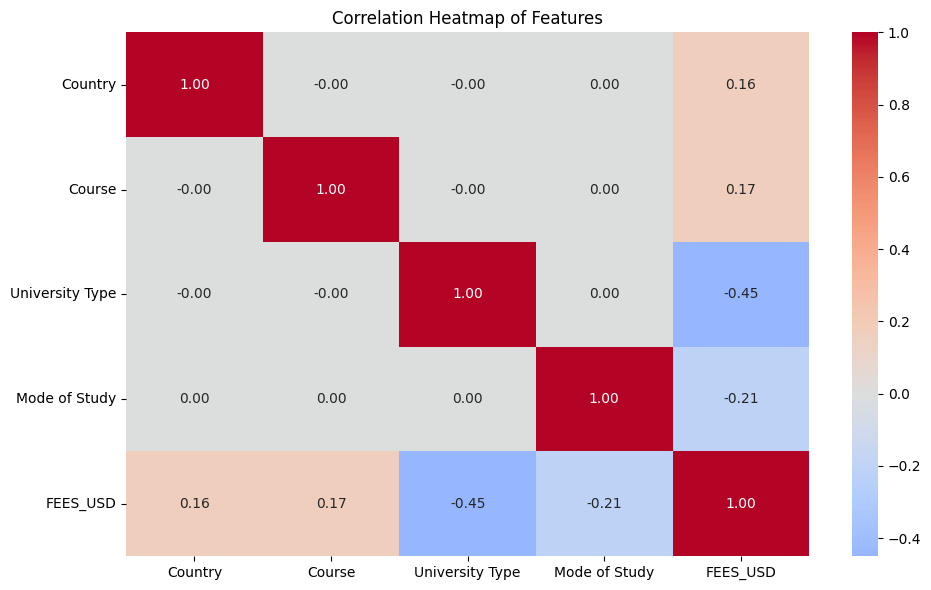

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualization 1: Correlation Heatmap

encoded_columns = ['Country', 'Course', 'University Type', 'Mode of Study', 'FEES_USD']

correlation_matrix = df[encoded_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

## Correlation Heatmap Analysis

The correlation heatmap reveals the relationships between different features and tuition fees.


*   The strongest correlation is between University Type and fees (-0.45), indicating that private universities tend to have higher fees.
*    The Mode of Study shows a moderate negative correlation (-0.21), suggesting that online programs generally cost less.

* Both Course Type and Country have weak positive correlations (0.17 and 0.16 respectively) with fees, indicating they have minimal impact on pricing.

The light-colored squares between features show they are mostly independent of each other, which is good for the model's performance. The dark red diagonal line shows each feature's perfect correlation with itself (1.0).


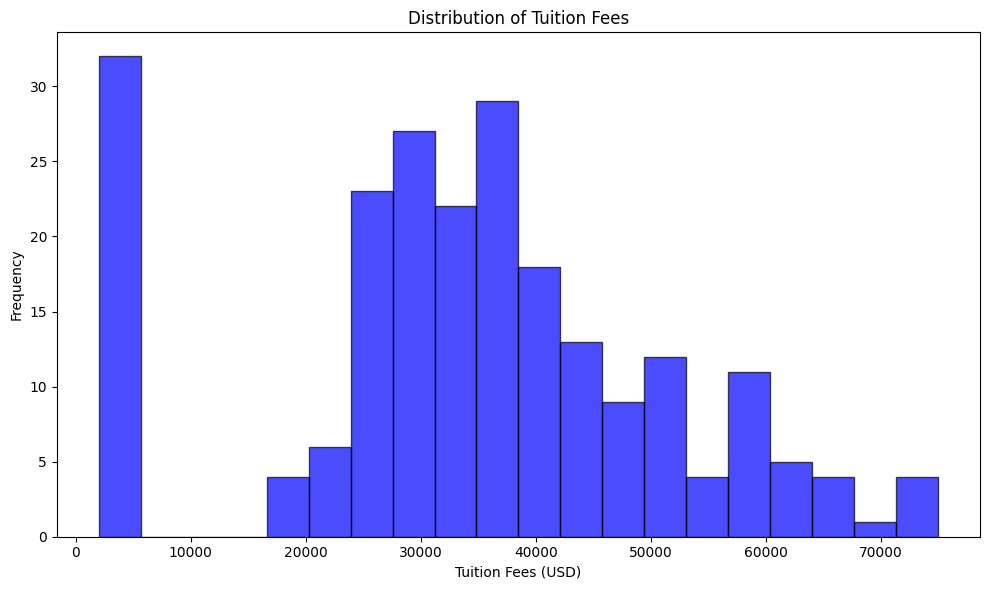

In [ ]:
 # Visualization 2: Histogram for the Distribution of Tuition Fees
plt.figure(figsize=(10, 6))
plt.hist(df['FEES_USD'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Tuition Fees')
plt.xlabel('Tuition Fees (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Distribution of Tuition Fees Analysis

The histogram shows a bimodal (two-peak) distribution of international tuition fees.

* The first major peak occurs at the lower end (around $2,000-$5,000), representing public universities in countries like Germany and France.

* The second peak appears in the middle range (around $30,000-$40,000), representing private universities and institutions in countries like the USA and UK.

 The spread of fees ranges from 2,000 to $75,000, with fewer institutions charging fees at the higher end of the scale.



In [ ]:
# Prepare features and target
X = df[[
    'Country',
    'Course',
    'University Type',
    'Mode of Study'
]]
y = df['FEES_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
# 1. Linear Regression with Gradient Descent
from sklearn.linear_model import SGDRegressor


lr_model = SGDRegressor(
    loss='squared_error',
    learning_rate='adaptive',
    eta0=0.01,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

# Train the model using gradient descent
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
# Print results
print("\nModel Comparison:")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R2: {lr_r2:.4f}")
print(f"Decision Tree - MSE: {dt_mse:.2f}, R2: {dt_r2:.4f}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R2: {rf_r2:.4f}")


Model Comparison:
Linear Regression - MSE: 226944655.81, R2: 0.0500
Decision Tree - MSE: 19125902.22, R2: 0.9199
Random Forest - MSE: 19877463.24, R2: 0.9168


In [ ]:
# Save all models as pkl
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
# Save the best performing model (based on MSE)
best_mse = min(lr_mse, dt_mse, rf_mse)
if best_mse == lr_mse:
    best_model = lr_model
    model_name = 'linear_regression'
elif best_mse == dt_mse:
    best_model = dt_model
    model_name = 'decision_tree'
else:
    best_model = rf_model
    model_name = 'random_forest'

# Print the best MSE
print("Best MSE:", best_mse)
print(f"\nBest performing model: {model_name}")


Best MSE: 19125902.222222224

Best performing model: decision_tree


In [ ]:
# Saved the best model
with open(f'{model_name}_best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
# Make prediction on one test data point
test_row = X_test.iloc[0:1]
test_row_scaled = scaler.transform(test_row)
prediction = best_model.predict(test_row_scaled)[0]
actual = y_test.iloc[0]

print("\nSample Prediction:")
print(f"Actual tuition fee: ${actual:,.2f}")
print(f"Predicted tuition fee: ${prediction:,.2f}")
print(f"Prediction error: ${abs(actual - prediction):,.2f}")


Sample Prediction:
Actual tuition fee: $2,240.00
Predicted tuition fee: $2,400.00
Prediction error: $160.00


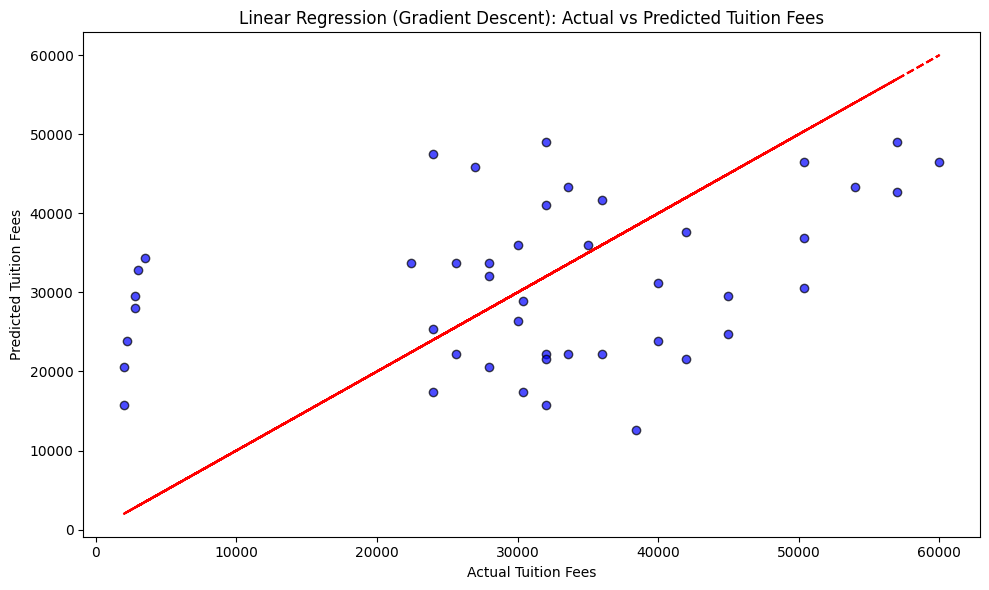

In [ ]:
# Scatter plot of actual vs predicted for linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, alpha=0.7, color='blue', edgecolor='black')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual Tuition Fees')
plt.ylabel('Predicted Tuition Fees')
plt.title('Linear Regression (Gradient Descent): Actual vs Predicted Tuition Fees')
plt.tight_layout()
plt.show()


# Scatter Plot Performance Analysis
This scatter plot shows how well the linear regression model predicts tuition fees. The red line represents perfect predictions, while the blue dots show actual vs. predicted values. The scattered pattern of points around the line indicates moderate prediction accuracy. Points above the line represent overestimated fees, while points below show underestimated fees.


In [ ]:
#Function for prediction

def predict_tuition(country, course_type, univ_type, mode_of_study):
    """
    Make a prediction using the trained model.
    """
    try:
        # Convert country to uppercase to match training data format
        country = country.upper()

        # Load the saved model and preprocessors
        with open(f'{model_name}_best_model.pkl', 'rb') as file:
            model = pickle.load(file)

        with open('scaler.pkl', 'rb') as file:
            scaler = pickle.load(file)

        with open('encoders_and_mappings.pkl', 'rb') as file:
            encoders_and_mappings = pickle.load(file)

        # Extract mappings
        le_country_mapping = encoders_and_mappings['le_country_mapping']
        le_course_mapping = encoders_and_mappings['le_course_mapping']
        le_univ_type_mapping = encoders_and_mappings['le_univ_type_mapping']
        le_mode_mapping = encoders_and_mappings['le_mode_mapping']

        # Validate input
        if country not in le_country_mapping:
            raise ValueError(f"Invalid country: {country}. Available options: {list(le_country_mapping.keys())}")
        if course_type not in le_course_mapping:
            raise ValueError(f"Invalid course type: {course_type}. Available options: {list(le_course_mapping.keys())}")
        if univ_type not in le_univ_type_mapping:
            raise ValueError(f"Invalid university type: {univ_type}. Available options: {list(le_univ_type_mapping.keys())}")
        if mode_of_study not in le_mode_mapping:
            raise ValueError(f"Invalid mode of study: {mode_of_study}. Available options: {list(le_mode_mapping.keys())}")

        # Encode input
        country_encoded = le_country_mapping[country]
        course_encoded = le_course_mapping[course_type]
        univ_encoded = le_univ_type_mapping[univ_type]
        mode_encoded = le_mode_mapping[mode_of_study]

        # Create feature array
        features = pd.DataFrame([[country_encoded, course_encoded, univ_encoded, mode_encoded]],
                              columns=['Country', 'Course', 'University Type', 'Mode of Study'])

        # Scale features
        features_scaled = scaler.transform(features)

        # Make prediction
        prediction = model.predict(features_scaled)[0]

        return prediction

    except Exception as e:
        print(f"Error making prediction: {str(e)}")
        raise

# Test the prediction function
try:
    example_prediction = predict_tuition(
        country="Germany",
        course_type="Computer Science",
        univ_type="Public",
        mode_of_study="Full-time"
    )
    print(f"\nExample Prediction:")
    print(f"Predicted tuition fee: ${example_prediction:,.2f}")
except ValueError as e:
    print(f"Input error: {e}")



Example Prediction:
Predicted tuition fee: $2,800.00
